<a href="https://colab.research.google.com/github/Aleeshbah11/Data-Cleaning/blob/main/DataCleaning(Movie).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

df = pd.read_csv('movie.csv', encoding= 'latin-1')
df.head()

,movie_title,rating,duration,week1,week2,week3,week4,imdb,rotten,title_year
0,Avatar?ÿ,723,178.0,10,855,1000,4834.0,NaN,3054,2009.0
1,Pirates of the Caribbean: At World's End?ÿ,302,NaN,563,1000,40000,48350.0,NaN,1238,NaN
2,Spectre?ÿ,602,148.0,20,161,11000,11700.0,1.0,994,2015.0
3,The Dark Knight Rises?ÿ,813,NaN,22000,23000,27000,106759.0,NaN,2701,NaN
4,John Carter?ÿ,462,132.0,"""475""",530,640,1873.0,1.0,738,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   movie_title  14 non-null     object 
 1   rating       14 non-null     int64  
 2   duration     11 non-null     float64
 3   week1        12 non-null     object 
 4   week2        14 non-null     int64  
 5   week3        14 non-null     int64  
 6   week4        12 non-null     float64
 7   imdb         9 non-null      float64
 8   rotten       14 non-null     int64  
 9   title_year   7 non-null      float64
dtypes: float64(4), int64(4), object(2)
memory usage: 1.2+ KB


In [ ]:
df.isnull()

,movie_title,rating,duration,week1,week2,week3,week4,imdb,rotten,title_year
0,False,False,False,False,False,False,False,True,False,False
1,False,False,True,False,False,False,False,True,False,True
2,False,False,False,False,False,False,False,False,False,False
3,False,False,True,False,False,False,False,True,False,True
4,False,False,False,False,False,False,False,False,False,True
5,False,False,False,False,False,False,False,True,False,False
6,False,False,True,False,False,False,True,False,False,True
7,False,False,False,False,False,False,False,False,False,True
8,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,True


In [ ]:
df.isnull().sum()

,0
movie_title,0
rating,0
duration,3
week1,2
week2,0
week3,0
week4,2
imdb,5
rotten,0
title_year,7


In [ ]:
round(df.isnull().sum()/df.shape[0]*100,2)

,0
movie_title,0.0
rating,0.0
duration,0.0
week1,0.0
week2,0.0
week3,0.0
week4,0.0
imdb,0.0
rotten,0.0
title_year,0.0


- convert col['week1'] str into int

In [ ]:
df['week1']=pd.to_numeric(df['week1'])
df['week1']

,week1
0,10.000000
1,563.000000
2,20.000000
3,22000.000000
4,2171.909091
5,23.000000
6,15.000000
7,10.000000
8,10.000000
9,282.000000


it has converted "475" into its numeric value of 2171.9

## Fill in the missing values using mean imputation

In [ ]:
df['duration'] = df['duration'].fillna(df['duration'].mean())
df['week1']= df['week1'].fillna(df['week1'].mean())
df['week4']=df['week4'].fillna(df['week4'].mean())
df['imdb']=df['imdb'].fillna(df['imdb'].mean())
df['title_year']=df['title_year'].fillna(df['title_year'].mean())

In [ ]:
#accessing value
df.at[4,'week1']

2171.909090909091

In [ ]:
df.isnull()

,movie_title,rating,duration,week1,week2,week3,week4,imdb,rotten,title_year
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False


- missing values are now filled using mean of each column

## Handling Outliers

In [ ]:
df['week1']

,week1
0,10.000000
1,563.000000
2,20.000000
3,22000.000000
4,2171.909091
5,23.000000
6,15.000000
7,10.000000
8,10.000000
9,282.000000


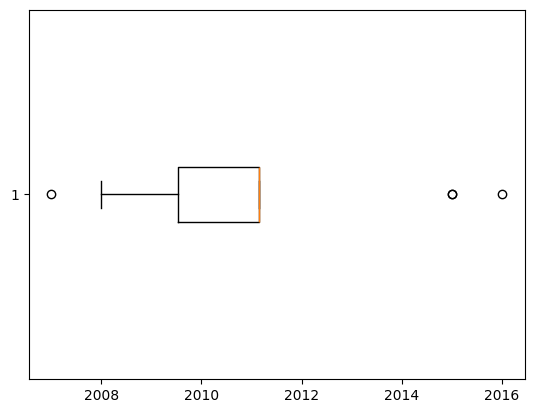

In [ ]:
import matplotlib.pyplot as plt

plt.boxplot(df['title_year'], vert = False)
#plt.xlabel('week 1')
plt.show()

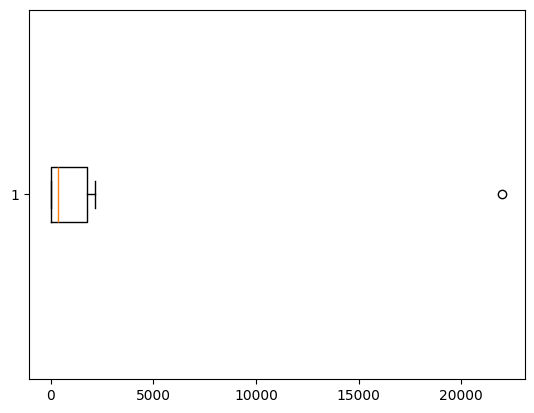

In [ ]:
plt.boxplot(df['week1'], vert = False)
plt.show()

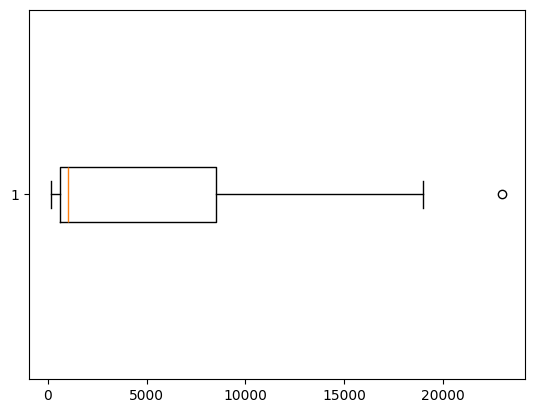

In [ ]:
plt.boxplot(df['week2'], vert = False)
plt.show()

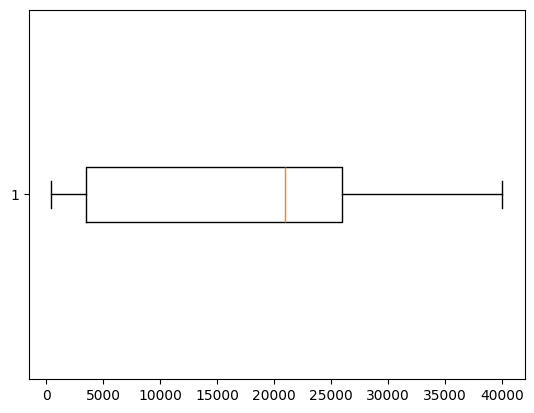

In [ ]:
plt.boxplot(df['week3'], vert = False)
plt.show()

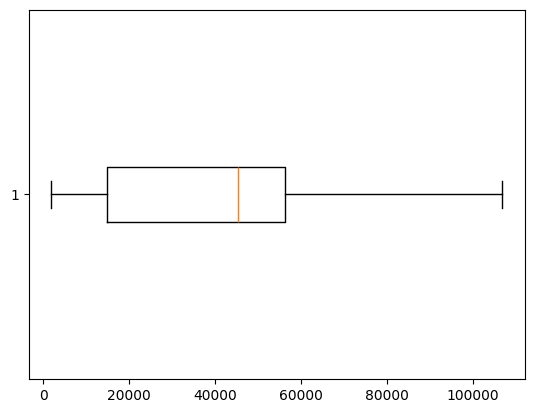

In [ ]:
plt.boxplot(df['week4'], vert = False)
plt.show()

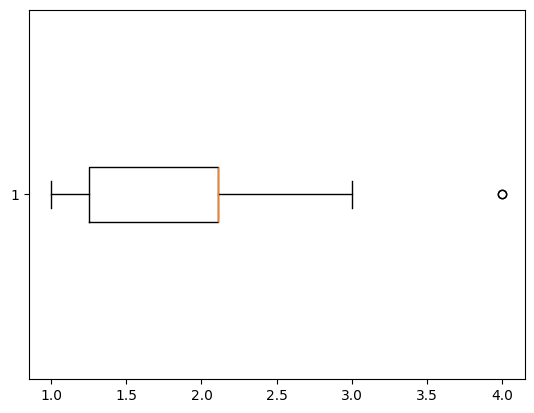

In [ ]:
plt.boxplot(df['imdb'], vert = False)
plt.show()

In [ ]:
mean = df['week4'].mean()
print("mean:", mean)
std = df['week4'].std()
print("std:", std)

mean: 44773.583333333336
std: 34302.559167722866


In [ ]:
upper_bound = mean + std*2
lower_bound = mean - std*2
print("upper bound:", upper_bound)
print("lower bound:", lower_bound)

upper bound: 113378.70166877907
lower bound: -23831.535002112396


In [ ]:
X = df[['week1','week2','week3','week4']]

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range= (0,1))

num_col_ = [col for col in X.columns if X[col].dtype != 'object']
X1=X

X1[num_col_] = scaler.fit_transform(X1[num_col_])
X1.head()

<ipython-input-160-ea95f35b8b3e>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X1[num_col_] = scaler.fit_transform(X1[num_col_])


,week1,week2,week3,week4
0,0.000000,0.030387,0.013882,0.028231
1,0.025148,0.036735,1.000000,0.443119
2,0.000455,0.000000,0.266732,0.093692
3,1.000000,1.000000,0.671294,1.000000
4,0.098313,0.016157,0.004779,0.000000
